# Init

In [1]:
import os, sys

ROOT_DIR = '../..'
sys.path.append(ROOT_DIR)
os.chdir(ROOT_DIR)

from dotenv import load_dotenv
load_dotenv('.env')

DATAPATH = os.getenv("DATAPATH")

import pandas as pd 
import numpy as np

In [2]:
df_features = pd.read_parquet(os.path.join(DATAPATH, 'staged', 'features.parquet'))
df_target = pd.read_parquet(os.path.join(DATAPATH, 'staged', 'target.parquet'))

# Análise das variáveis alvo

In [3]:
df_item_level = df_target['item'].str.strip('.').str.split('.').apply(len).to_frame(name='item_level')
df_target = pd.concat([df_target, df_item_level], axis=1)
df_target

,item,referencia,tipo,codigo,descricao,unid.,quantidade,bdi,preco_material_unitario,preco_material_total,preco_execucao_unitario,preco_execucao_total,preco_unitario,preco_total,id_project,item_level
0,1.,None,None,None,ETAPAS PRE OBRA,None,NaN,0.0,NaN,NaN,NaN,8086.25,NaN,8086.25,0,1
1,1.1.,None,None,None,SONDAGEM,None,NaN,0.0,NaN,NaN,NaN,3000.00,NaN,3000.00,0,2
2,1.1.1,MKS_COMPOSICOES,COMPOSICAO,CMP_INF-SON,SONDAGEM,VB,1.0,0.0,NaN,NaN,3000.00,3000.00,3000.00,3000.00,0,3
3,1.2.,None,None,None,LEVANTAMENTO TOPOGRAFICO,None,NaN,0.0,NaN,NaN,NaN,1200.00,NaN,1200.00,0,2
4,1.2.1,MKS_COMPOSICOES,COMPOSICAO,CMP_INF-LVT,LEVANTAMENTO TOPOGRAFICO,VB,1.0,0.0,NaN,NaN,1200.00,1200.00,1200.00,1200.00,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,16.,None,None,None,FORMALIZACAO DA ENTREGA,None,NaN,0.0,NaN,NaN,NaN,912.85,NaN,912.85,1,1
464,16.1.,None,None,None,HABITE-SE E AVERBACAO,None,NaN,0.0,NaN,NaN,NaN,912.85,NaN,912.85,1,2
465,16.1.1,MKS_COMPOSICOES,COMPOSICAO,CMP_EPO-TAX-AVR,TAXA AVERBACAO,VB,1.0,0.0,NaN,NaN,502.85,502.85,502.85,502.85,1,3
466,16.1.2,MKS_COMPOSICOES,COMPOSICAO,CMP_EPO-TAX-HBT,TAXA HABITE-SE PREFEITURA,VB,1.0,0.0,NaN,NaN,150.00,150.00,150.00,150.00,1,3


In [4]:
# df_target[['item', 'referencia', 'tipo', 'codigo', 'descricao']].drop_duplicates().groupby('item').agg({'item': 'count'}).query('item > 1')
df_target.query('item == "13.3.1"')

,item,referencia,tipo,codigo,descricao,unid.,quantidade,bdi,preco_material_unitario,preco_material_total,preco_execucao_unitario,preco_execucao_total,preco_unitario,preco_total,id_project,item_level
131,13.3.1,MKS_COMPOSICOES,COMPOSICAO,CMP_ICP-PSC-160-GRD,"PISCINA GRANDE H1,60 EM CONCRETO ARMADO IMPERM...",M2,19.83,0.0,2460.0,48781.8,NaN,NaN,2460.0,48781.8,0,3
283,13.3.1,MKS_COMPOSICOES,COMPOSICAO,CMP_ICP-CHR-PMC-065X055,CHURRASQUEIRA PRE MOLDADA DE CONCRETO,UN,1.00,0.0,4535.0,4535.0,NaN,NaN,4535.0,4535.0,2,3
450,13.3.1,MKS_COMPOSICOES,COMPOSICAO,CMP_ICP-GDC-INO,GUARDA CORPO INOX 110CM,ML,10.34,0.0,1925.0,19904.5,NaN,NaN,1925.0,19904.5,1,3


## Nota

* O identificador `item` não representa de forma atômica uma tupla (referencia, tipo, codigo, descricao)

In [5]:
# df_target.query('item_level == 1')[['item', 'tipo', 'codigo', 'descricao']].drop_duplicates().groupby('item').agg({'item': 'count'}).rename(columns={'item': 'count'}).sort_values(by='count', ascending=False)
df_target.query('item.isin(["1.", "4.", "5."])').sort_values(by='item')

,item,referencia,tipo,codigo,descricao,unid.,quantidade,bdi,preco_material_unitario,preco_material_total,preco_execucao_unitario,preco_execucao_total,preco_unitario,preco_total,id_project,item_level
0,1.,None,None,None,ETAPAS PRE OBRA,None,NaN,0.0,NaN,NaN,NaN,8086.25,NaN,8086.25,0,1
151,1.,None,None,None,ETAPAS PRE OBRA,None,NaN,0.0,NaN,NaN,NaN,9286.25,NaN,9286.25,2,1
307,1.,None,None,None,,None,NaN,0.0,NaN,NaN,NaN,8086.25,NaN,8086.25,1,1
47,4.,None,None,None,SUPRAESTRUTURA,None,NaN,0.0,NaN,148767.71,NaN,85031.60,NaN,233799.31,0,1
193,4.,None,None,None,COBERTURA,None,NaN,0.0,NaN,33117.10,NaN,8461.05,NaN,41578.15,2,1
352,4.,None,None,None,COBERTURA,None,NaN,0.0,NaN,43570.02,NaN,8284.90,NaN,51854.92,1,1
55,5.,None,None,None,COBERTURA,None,NaN,0.0,NaN,40996.72,NaN,8175.00,NaN,49171.72,0,1
199,5.,None,None,None,SUPRAESTRUTURA,None,NaN,0.0,NaN,225973.66,NaN,109316.30,NaN,335289.96,2,1
364,5.,None,None,None,SUPRAESTRUTURA,None,NaN,0.0,NaN,148080.79,NaN,81194.75,NaN,229275.54,1,1


## Nota

* Não há garantia de que `item`, em qualquer nível, esteja associado à mesma `descricao`

In [6]:
display(df_target['referencia'].unique())
display(df_target['tipo'].unique())

array([None, 'MKS_COMPOSICOES'], dtype=object)

array([None, 'COMPOSICAO'], dtype=object)

## Nota

* Para a amostra considerada `referencia` e `tipo` não apresentam variação de valores, logo podem ser ignoradas.

In [7]:
df = df_target[['codigo', 'descricao']]
df

,codigo,descricao
0,None,ETAPAS PRE OBRA
1,None,SONDAGEM
2,CMP_INF-SON,SONDAGEM
3,None,LEVANTAMENTO TOPOGRAFICO
4,CMP_INF-LVT,LEVANTAMENTO TOPOGRAFICO
...,...,...
463,None,FORMALIZACAO DA ENTREGA
464,None,HABITE-SE E AVERBACAO
465,CMP_EPO-TAX-AVR,TAXA AVERBACAO
466,CMP_EPO-TAX-HBT,TAXA HABITE-SE PREFEITURA


In [8]:
display(df.groupby('codigo')['descricao'].nunique().loc[lambda x: x > 1])
display(df.groupby('descricao')['codigo'].nunique().loc[lambda x: x > 1])

Series([], Name: descricao, dtype: int64)

Series([], Name: codigo, dtype: int64)

## Nota

* `codigo` e `descricao` estão sempre associados a um único valor, logo as variáveis são redundantes.

In [9]:
df = df_target.query('item_level == 3')[['descricao', 'id_project', 'preco_total']]
df

,descricao,id_project,preco_total
2,SONDAGEM,0,3000.00
4,LEVANTAMENTO TOPOGRAFICO,0,1200.00
6,APROVACAO DE PROJETOS E TAXAS,0,2000.00
7,CUSTOS DE IMPRESAO E PLOTAGEM,0,800.00
8,TAXA RRT,0,108.69
...,...,...,...
459,LIMPEZA FINAL DE OBRA,1,2875.00
462,"FORMALIZACAO DA ENTREGA VISTORIA, ACEITE",1,1.12
465,TAXA AVERBACAO,1,502.85
466,TAXA HABITE-SE PREFEITURA,1,150.00


<Axes: >

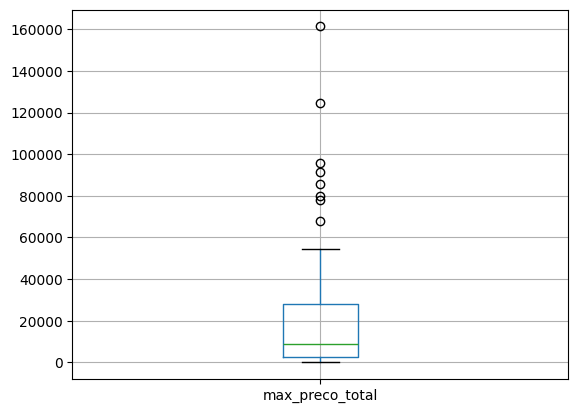

In [10]:
# df['preco_total'].isna().sum()
# First, aggregation by sum, due to duplicate items in the same budget.
df_grouped = df.groupby(['id_project', 'descricao']) \
    .agg({'preco_total': 'sum'}) \
    .reset_index() \
    .groupby('descricao') \
    .agg({'preco_total': 'max'}) \
    .rename(columns={'preco_total': 'max_preco_total'})

df_grouped.boxplot()

In [11]:
df_grouped.describe()

,max_preco_total
count,104.000000
mean,20014.892981
std,27767.898368
min,1.120000
25%,2429.407500
50%,8710.275000
75%,28046.207500
max,161404.550000


In [12]:
df.groupby('id_project').agg({'preco_total': 'sum'})

,preco_total
id_project,
0,1051728.18
1,856967.32
2,1523008.38


In [13]:
161404.55 / df.groupby('id_project').agg({'preco_total': 'sum'})['preco_total']

id_project
0    0.153466
1    0.188344
2    0.105977
Name: preco_total, dtype: float64

## Nota

* Pelo menos 75% dos itens de orçamento apresenta valor total máximo aproximado de 28.046 reais por projeto
* Dentre os itens de orçamento o valor total máximo aproximado é de 161.405 reais
* O valor total máximo aproximado encontra-se no intervalo percentual aproximado [0.11, 0.15] em relação ao valor total de cada projeto

# Análise das features

* Considerando a amostra (apenas 3 exemplos) e o fato de que nenhum item contribui com mais de 15% do valor total do orçamento, serão considerados como variáveis alvo o `preco_material_total` e o `preco_execucao_total` agregados por soma para cada projeto
* A análise das features será realizada com base nessa decisão

In [14]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df_grouped = df_target.query('item_level == 1').groupby('id_project').agg({'preco_material_total': 'sum', 'preco_execucao_total': 'sum'}).reset_index()
df_grouped

,id_project,preco_material_total,preco_execucao_total
0,0,673531.20,378196.96
1,1,548426.27,308541.05
2,2,1030667.74,492340.65


In [16]:
df = df_features.drop(columns=['titulo', 'filename']).merge(df_grouped, on='id_project', how='outer')
df

,id_project,tipologia,area_terreno,area_construida,area_fundacao,area_fachada,area_parede,qtde_bwcs,preco_material_total,preco_execucao_total
0,0,Térrea,485.0,246.63,237.98,597.88,615.86,5.0,673531.20,378196.96
1,1,Sobrado,300.0,249.24,161.55,747.17,662.06,4.0,548426.27,308541.05
2,2,Sobrado,500.0,425.00,378.31,521.67,581.76,6.0,1030667.74,492340.65
3,3,Sobrado,250.0,257.00,221.36,430.11,547.27,6.0,NaN,NaN


In [17]:
train_mask = df['id_project'] != 3
test_mask = df['id_project'] == 3
display(df[train_mask])
display(df[test_mask])

,id_project,tipologia,area_terreno,area_construida,area_fundacao,area_fachada,area_parede,qtde_bwcs,preco_material_total,preco_execucao_total
0,0,Térrea,485.0,246.63,237.98,597.88,615.86,5.0,673531.20,378196.96
1,1,Sobrado,300.0,249.24,161.55,747.17,662.06,4.0,548426.27,308541.05
2,2,Sobrado,500.0,425.00,378.31,521.67,581.76,6.0,1030667.74,492340.65


,id_project,tipologia,area_terreno,area_construida,area_fundacao,area_fachada,area_parede,qtde_bwcs,preco_material_total,preco_execucao_total
3,3,Sobrado,250.0,257.0,221.36,430.11,547.27,6.0,NaN,NaN


In [18]:
scaler = MinMaxScaler()
columns_to_scale = df.columns[2:8]
df.loc[train_mask, columns_to_scale] = scaler.fit_transform(df.loc[train_mask, columns_to_scale])
df.loc[test_mask, columns_to_scale] = scaler.transform(df.loc[test_mask, columns_to_scale])
target_columns = ['preco_material_total', 'preco_execucao_total']
df[target_columns] = df[target_columns] / 1000
df

,id_project,tipologia,area_terreno,area_construida,area_fundacao,area_fachada,area_parede,qtde_bwcs,preco_material_total,preco_execucao_total
0,0,Térrea,0.925,0.000000,0.352602,0.337960,0.424658,0.5,673.53120,378.19696
1,1,Sobrado,0.000,0.014633,0.000000,1.000000,1.000000,0.0,548.42627,308.54105
2,2,Sobrado,1.000,1.000000,1.000000,0.000000,0.000000,1.0,1030.66774,492.34065
3,3,Sobrado,-0.250,0.058138,0.275927,-0.406031,-0.429514,1.0,NaN,NaN


In [19]:
def categorical_to_int(s:pd.Series):
    unique_values = s.unique()
    keys = list(range(len(unique_values)))
    mapping = dict(zip(unique_values, keys))
    s = s.apply(lambda x: mapping[x])
    return s


df['tipologia'] = categorical_to_int(df['tipologia'])
df

,id_project,tipologia,area_terreno,area_construida,area_fundacao,area_fachada,area_parede,qtde_bwcs,preco_material_total,preco_execucao_total
0,0,0,0.925,0.000000,0.352602,0.337960,0.424658,0.5,673.53120,378.19696
1,1,1,0.000,0.014633,0.000000,1.000000,1.000000,0.0,548.42627,308.54105
2,2,1,1.000,1.000000,1.000000,0.000000,0.000000,1.0,1030.66774,492.34065
3,3,1,-0.250,0.058138,0.275927,-0.406031,-0.429514,1.0,NaN,NaN


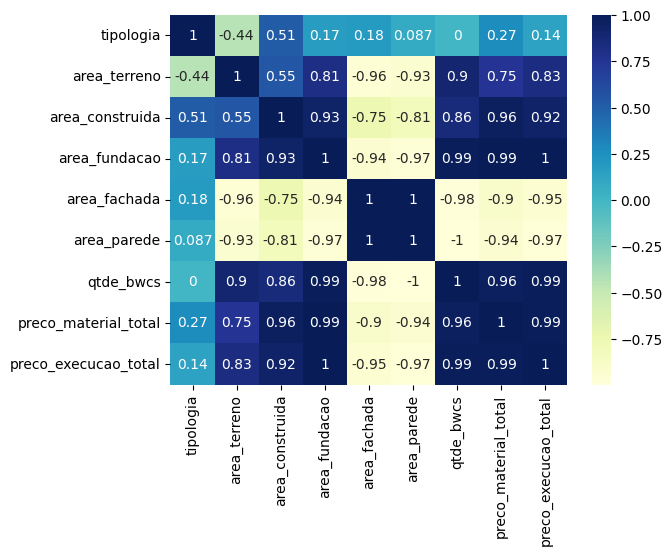

In [20]:
coef_corr = df[train_mask].drop(columns='id_project').corr()
sns.heatmap(coef_corr, cmap="YlGnBu", annot=True)
plt.show()

## Nota

* As variáveis independentes quantitativas apresentam correlação forte ou muito forte na maioria dos casos
* A variável independente categórica (`tipologia`) apresenta correlação fraca ou desprezível para a maioria dos casos
* Em relação às variáveis dependentes, `area_fundacao` é a variável independente que apresenta maior correlação

In [21]:
df.to_parquet(os.path.join(DATAPATH, 'staged', 'preprocessed.parquet'))